**20L-0961 Lab 3 FBDA**

Let's get scatter plot of some data 

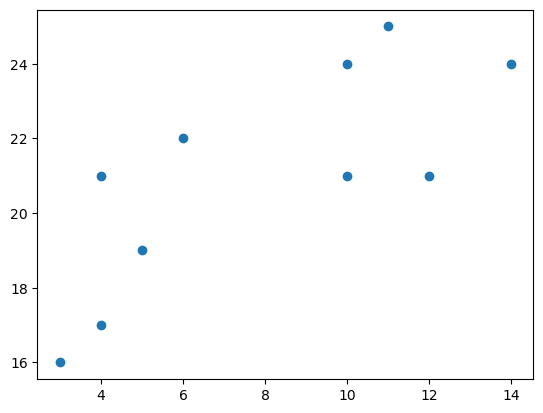

In [12]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

utilize the elbow method to visualize the intertia for different values of K

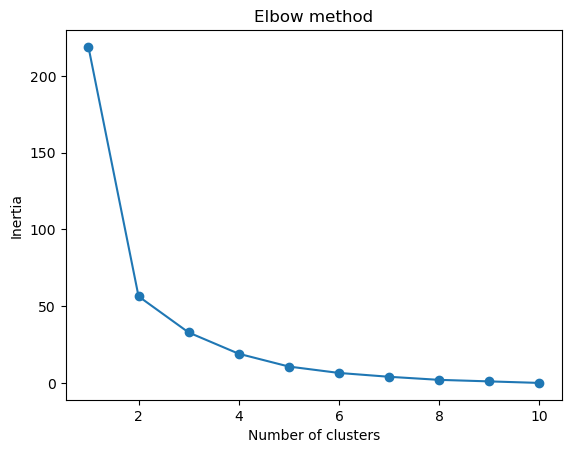

In [13]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

visualize the result at elbow (k=2)

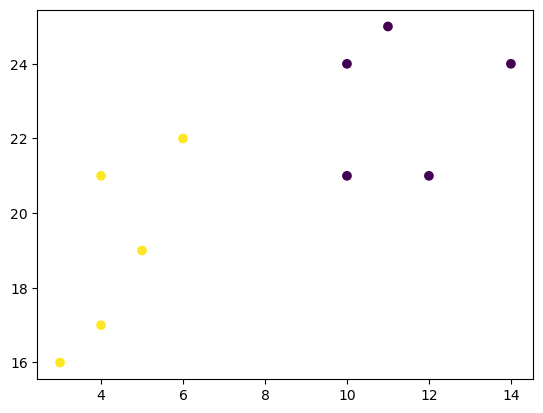

In [14]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()


In [15]:
# lets load in Mall_Customer.csv
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Use built in k-means function to work on given data, use annual
# income and spending score.

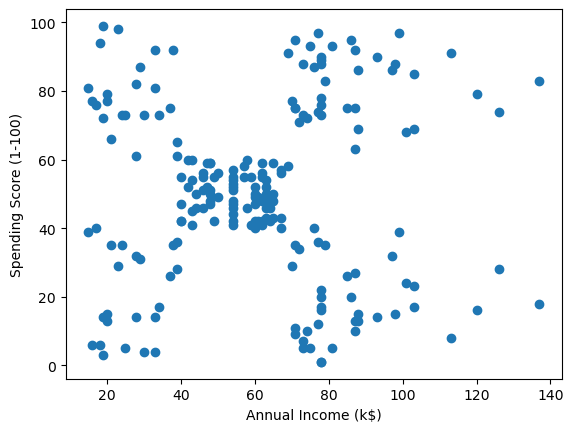

In [16]:
# get scatter plot of data
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

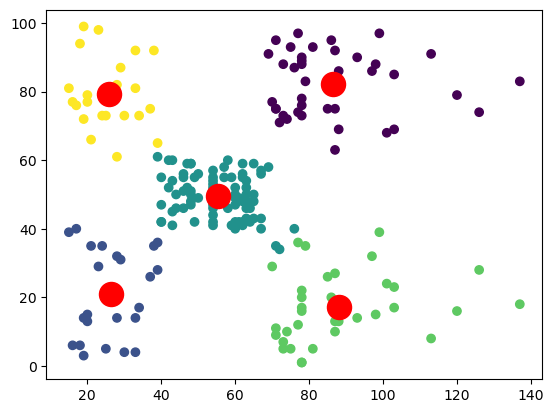

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df.iloc[:, [3, 4]].values
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


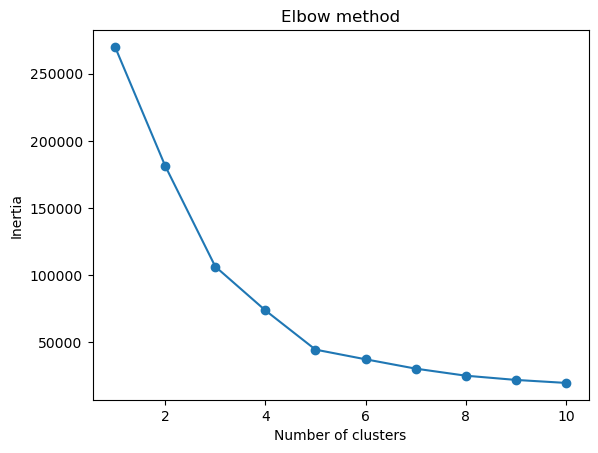

In [18]:
# elbow method to get best value of K
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

> A good estimate of elbow is k=5, which we have implemented above.

# Design your own K-means clustering algorithm, use annual
# income and spending score.

In [19]:
import numpy as np
class MKMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iter):
            self.labels_ = np.argmin(np.linalg.norm(X[:, None] - self.cluster_centers_, axis=2), axis=1)
            new_cluster_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.cluster_centers_ == new_cluster_centers):
                break
            self.cluster_centers_ = new_cluster_centers
        return self

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, None] - self.cluster_centers_, axis=2), axis=1)
    

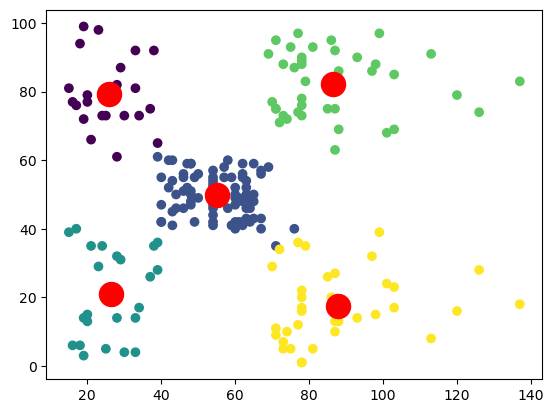

In [21]:
kmeans = MKMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()